<a href="https://colab.research.google.com/github/ElenirOliveira/Telecomx-2/blob/main/TELECOMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Caminho do arquivo JSON
url = '/content/TelecomX_Data.json'
df_raw = pd.read_json(url)

In [3]:
df_raw

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
# Verifica se as colunas aninhadas existem antes de expandir
colunas_aninhadas = ['customer', 'phone', 'internet', 'account']
colunas_existentes = [col for col in colunas_aninhadas if col in df_raw.columns]


In [5]:
# Expande apenas as colunas que existem
df_expandido = pd.concat(
    [df_raw.drop(columns=colunas_existentes)] +
    [df_raw[col].apply(pd.Series) for col in colunas_existentes if col in df_raw.columns],
    axis=1
)


In [6]:
# Renomeia se a coluna existir
if "customerID" in df_expandido.columns:
    df_expandido.rename(columns={"customerID": "id_cliente"}, inplace=True)


In [7]:
# Expandindo coluna Charges, se existir
if 'Charges' in df_expandido.columns:
    charges_expandido = df_expandido['Charges'].apply(pd.Series)
    df_expandido = pd.concat([
        df_expandido.drop(columns=['Charges']),
        charges_expandido
    ], axis=1)

# Renomear colunas após expandir
df_expandido.rename(columns={
    'Monthly': 'valor_mensal',
    'Total': 'valor_total',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Tempo de serviço',
    'PhoneService': 'Telefone',
    'MultipleLines': 'Multiplas linhas',
    'InternetService': 'Servico de internet',
    'OnlineSecurity': 'Seguranca online',
    'OnlineBackup': 'Backup',
    'DeviceProtection': 'Protecao de dispositivo',
    'TechSupport': 'Suporte tecnico',
    'StreamingTV': 'Streaming TV',
    'StreamingMovies': 'Streaming Filmes',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Faturamento',
    'PaymentMethod': 'Metodo de pagamento'
}, inplace=True)

# Conversão numérica com tratamento de valores ausentes
if 'valor_mensal' in df_expandido.columns:
    df_expandido['valor_mensal'] = pd.to_numeric(df_expandido['valor_mensal'], errors='coerce').fillna(0)
if 'valor_total' in df_expandido.columns:
    df_expandido['valor_total'] = pd.to_numeric(df_expandido['valor_total'], errors='coerce').fillna(0)

print(df_expandido.head())


   id_cliente Churn  Genero  Idoso Parceiro Dependentes  Tempo de serviço  \
0  0002-ORFBO    No  Female      0      Yes         Yes                 9   
1  0003-MKNFE    No    Male      0       No          No                 9   
2  0004-TLHLJ   Yes    Male      0       No          No                 4   
3  0011-IGKFF   Yes    Male      1      Yes          No                13   
4  0013-EXCHZ   Yes  Female      1      Yes          No                 3   

  Telefone Multiplas linhas Servico de internet  ... Backup  \
0      Yes               No                 DSL  ...    Yes   
1      Yes              Yes                 DSL  ...     No   
2      Yes               No         Fiber optic  ...     No   
3      Yes               No         Fiber optic  ...    Yes   
4      Yes               No         Fiber optic  ...     No   

  Protecao de dispositivo Suporte tecnico Streaming TV Streaming Filmes  \
0                      No             Yes          Yes               No   
1       

In [8]:
# prompt: gerar comando para limpar e padronizar onde estiver em branco, limpar caracteres especial e duplicatas

import pandas as pd
import re

# Substitui valores em branco por NaN
df_expandido.replace('', pd.NA, inplace=True)

# Remove caracteres especiais de todas as colunas de string
for col in df_expandido.select_dtypes(include='object').columns:
    df_expandido[col] = df_expandido[col].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)) if pd.notna(x) else x)

# Remove duplicatas
df_expandido.drop_duplicates(inplace=True)

print(df_expandido.head())


  id_cliente Churn  Genero  Idoso Parceiro Dependentes  Tempo de serviço  \
0  0002ORFBO    No  Female      0      Yes         Yes                 9   
1  0003MKNFE    No    Male      0       No          No                 9   
2  0004TLHLJ   Yes    Male      0       No          No                 4   
3  0011IGKFF   Yes    Male      1      Yes          No                13   
4  0013EXCHZ   Yes  Female      1      Yes          No                 3   

  Telefone Multiplas linhas Servico de internet  ... Backup  \
0      Yes               No                 DSL  ...    Yes   
1      Yes              Yes                 DSL  ...     No   
2      Yes               No         Fiber optic  ...     No   
3      Yes               No         Fiber optic  ...    Yes   
4      Yes               No         Fiber optic  ...     No   

  Protecao de dispositivo Suporte tecnico Streaming TV Streaming Filmes  \
0                      No             Yes          Yes               No   
1             

In [9]:
# prompt: Agora, com os dados limpos, é hora de criar a coluna "Contas_Diarias". Utilize o faturamento mensal para calcular o valor diário, proporcionando uma visão mais detalhada do comportamento dos clientes ao longo do tempo.

# Assumindo que 'Tempo de serviço' é em meses e 'valor_mensal' é o faturamento mensal
# Criar a coluna 'Contas_Diarias' dividindo o 'valor_mensal' por 30 (aproximadamente o número de dias em um mês)
df_expandido['Contas_Diarias'] = df_expandido['valor_mensal'] / 30

print(df_expandido.head())

  id_cliente Churn  Genero  Idoso Parceiro Dependentes  Tempo de serviço  \
0  0002ORFBO    No  Female      0      Yes         Yes                 9   
1  0003MKNFE    No    Male      0       No          No                 9   
2  0004TLHLJ   Yes    Male      0       No          No                 4   
3  0011IGKFF   Yes    Male      1      Yes          No                13   
4  0013EXCHZ   Yes  Female      1      Yes          No                 3   

  Telefone Multiplas linhas Servico de internet  ... Protecao de dispositivo  \
0      Yes               No                 DSL  ...                      No   
1      Yes              Yes                 DSL  ...                      No   
2      Yes               No         Fiber optic  ...                     Yes   
3      Yes               No         Fiber optic  ...                     Yes   
4      Yes               No         Fiber optic  ...                      No   

  Suporte tecnico Streaming TV Streaming Filmes      Contrato 

In [10]:
# prompt: A padronização e transformação de dados é uma etapa opcional, mas altamente recomendada, pois visa tornar as informações mais consistentes, compreensíveis e adequadas para análise. Durante essa fase, você pode, por exemplo, converter valores textuais como "Sim" e "Não" em valores binários (1 e 0), facilitando o processamento matemático e a aplicação de modelos analíticos. transformar o genero em feminino e masculino e idoso em Sim e Não e as demais colunas onde dor sim e nao transformar em 0 ou 1

# Função para transformar 'Sim'/'Não' em 1/0
def transformar_sim_nao(df, colunas):
  for coluna in colunas:
    if coluna in df.columns:
      df[coluna] = df[coluna].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))
  return df

# Transformar colunas 'Sim'/'Não' em 1/0
colunas_sim_nao = ['Parceiro', 'Dependentes', 'Telefone', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
df_expandido = transformar_sim_nao(df_expandido, colunas_sim_nao)


# Transformar a coluna 'Genero' em 'Masculino' e 'Feminino'
if 'Genero' in df_expandido.columns:
  df_expandido['Genero'] = df_expandido['Genero'].apply(lambda x: 'Feminino' if x == 'Female' else ('Masculino' if x == 'Male' else x))

# Transformar a coluna 'Idoso' em 'Sim' e 'Não'
if 'Idoso' in df_expandido.columns:
  df_expandido['Idoso'] = df_expandido['Idoso'].apply(lambda x: 'Sim' if x == 1 else ('Não' if x == 0 else x))

print(df_expandido.head())

  id_cliente Churn     Genero Idoso  Parceiro  Dependentes  Tempo de serviço  \
0  0002ORFBO    No   Feminino   Não         1            1                 9   
1  0003MKNFE    No  Masculino   Não         0            0                 9   
2  0004TLHLJ   Yes  Masculino   Não         0            0                 4   
3  0011IGKFF   Yes  Masculino   Sim         1            0                13   
4  0013EXCHZ   Yes   Feminino   Sim         1            0                 3   

   Telefone Multiplas linhas Servico de internet  ... Protecao de dispositivo  \
0         1               No                 DSL  ...                      No   
1         1              Yes                 DSL  ...                      No   
2         1               No         Fiber optic  ...                     Yes   
3         1               No         Fiber optic  ...                     Yes   
4         1               No         Fiber optic  ...                      No   

  Suporte tecnico Streaming TV S

In [11]:
# prompt: Para começar, realize uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes. vamos fazer todas as analises em dataframe

# Realizando a análise descritiva para as colunas numéricas
# Selecionando apenas as colunas numéricas para a análise descritiva
df_numeric = df_expandido.select_dtypes(include=['number'])

# Calculando as métricas descritivas
analise_descritiva = df_numeric.describe()

# Exibindo a análise descritiva
print("\nAnálise Descritiva das Colunas Numéricas:")
print(analise_descritiva)

# Para as colunas categóricas, podemos verificar a contagem de valores únicos
df_categorical = df_expandido.select_dtypes(include=['object'])

print("\nAnálise Descritiva das Colunas Categóricas (Contagem de Valores):")
for col in df_categorical.columns:
  print(f"\nColuna: {col}")
  print(df_categorical[col].value_counts())


Análise Descritiva das Colunas Numéricas:
          Parceiro  Dependentes  Tempo de serviço     Telefone  valor_mensal  \
count  7267.000000  7267.000000       7267.000000  7267.000000   7267.000000   
mean      0.484106     0.300124         32.346498     0.902711     64.720098   
std       0.499782     0.458343         24.571773     0.296371     30.129572   
min       0.000000     0.000000          0.000000     0.000000     18.250000   
25%       0.000000     0.000000          9.000000     1.000000     35.425000   
50%       0.000000     0.000000         29.000000     1.000000     70.300000   
75%       1.000000     1.000000         55.000000     1.000000     89.875000   
max       1.000000     1.000000         72.000000     1.000000    118.750000   

       valor_total  Contas_Diarias  
count  7267.000000     7267.000000  
mean   2277.182035        2.157337  
std    2268.648587        1.004319  
min       0.000000        0.608333  
25%     396.200000        1.180833  
50%    1389.20

/tmp/ipython-input-145202945.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='Churn', palette={'Yes':'blue', 'No':'red'})


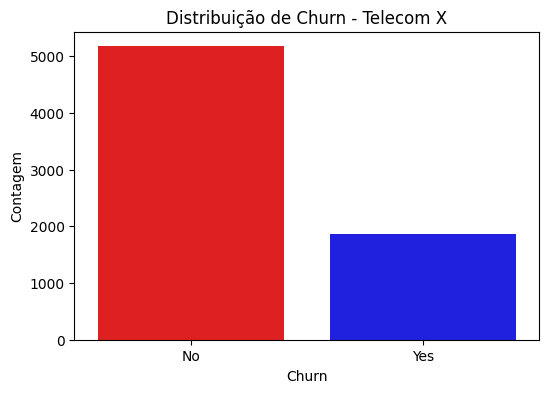

In [12]:
def plot_Churn_distribution(df):
    if 'Churn' not in df.columns:
        print("Coluna 'Churn' não encontrada.")
        return
    df_filtered = df[df['Churn'].isin(['Yes', 'No'])]
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_filtered, x='Churn', palette={'Yes':'blue', 'No':'red'})
    plt.title('Distribuição de Churn - Telecom X')
    plt.xlabel('Churn')
    plt.ylabel('Contagem')
    plt.show()

plot_Churn_distribution(df_expandido)

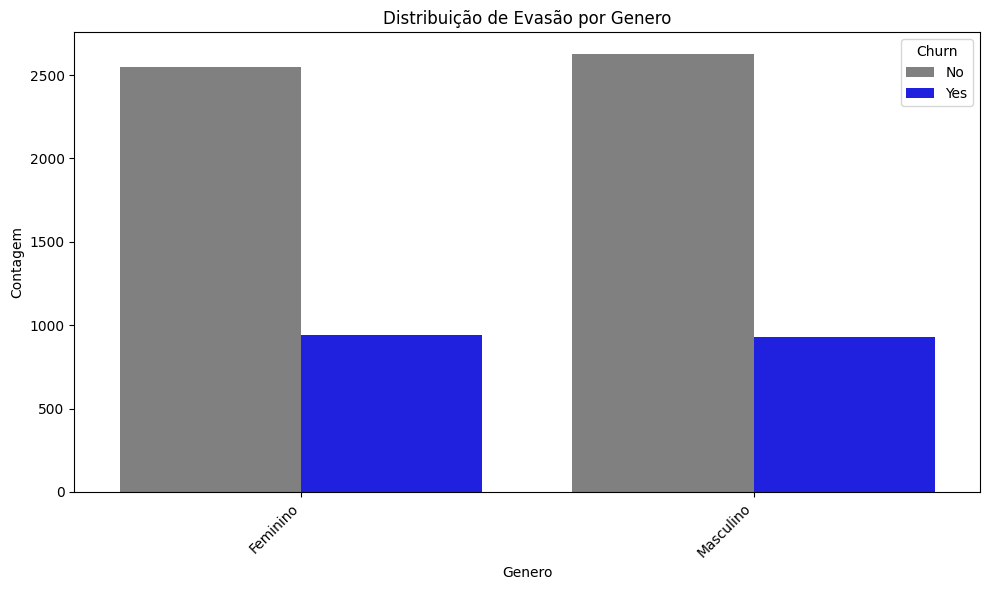

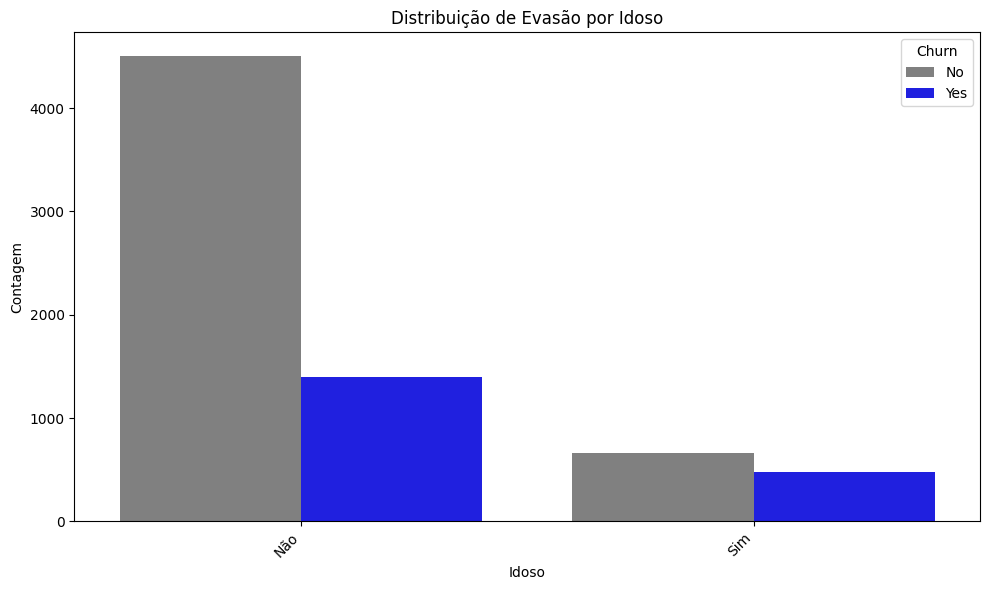

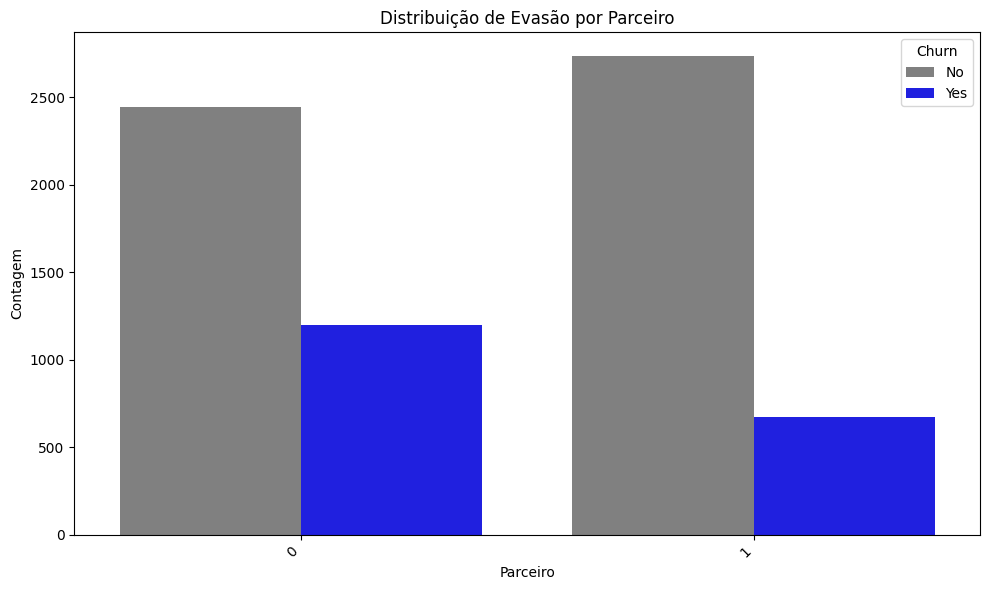

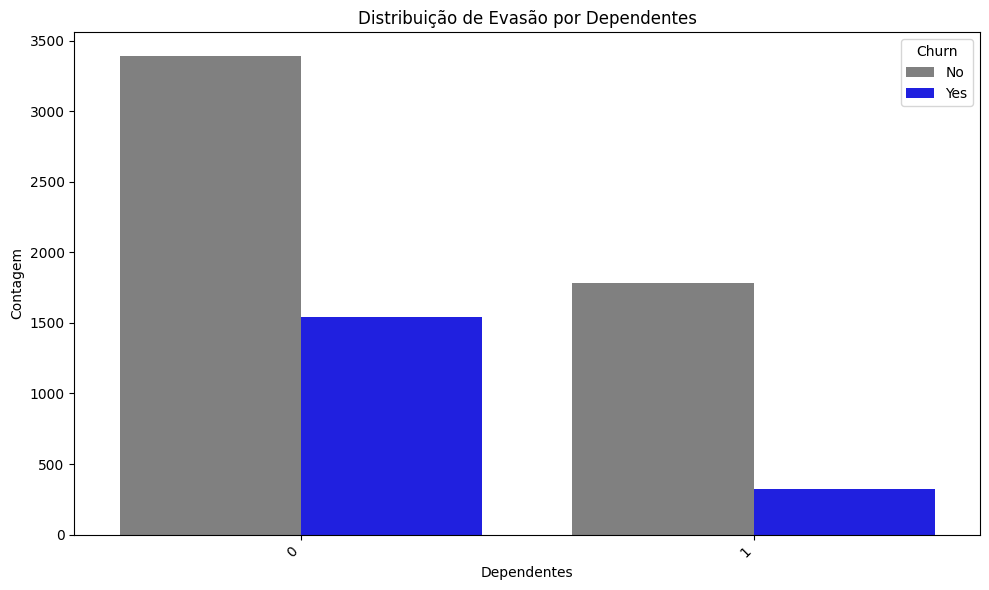

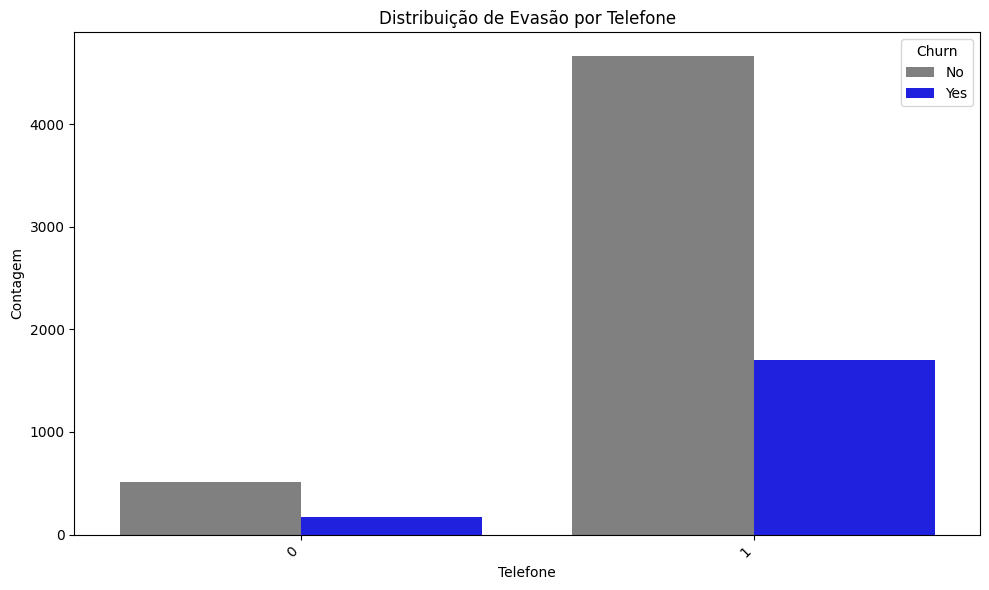

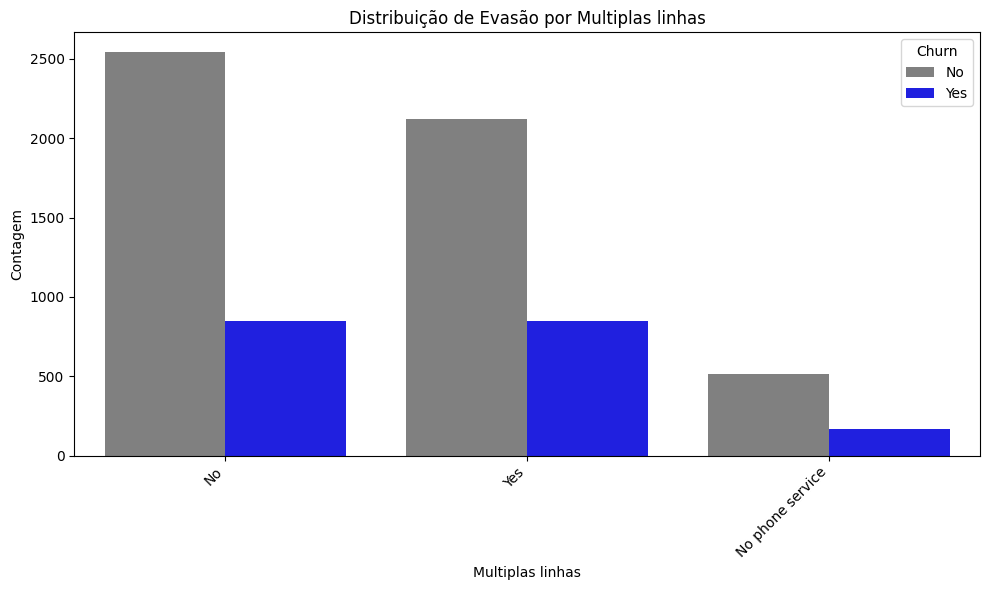

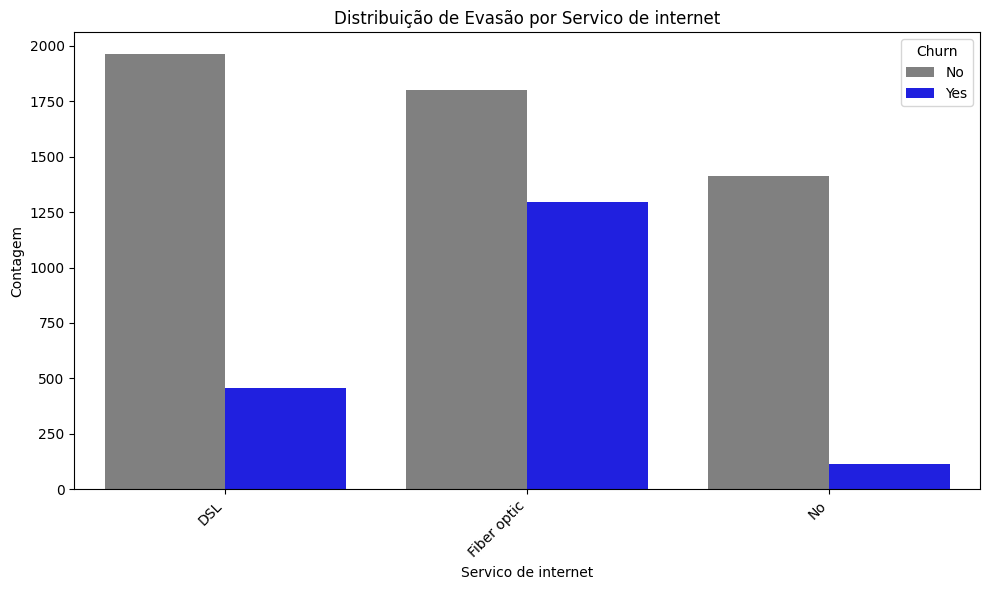

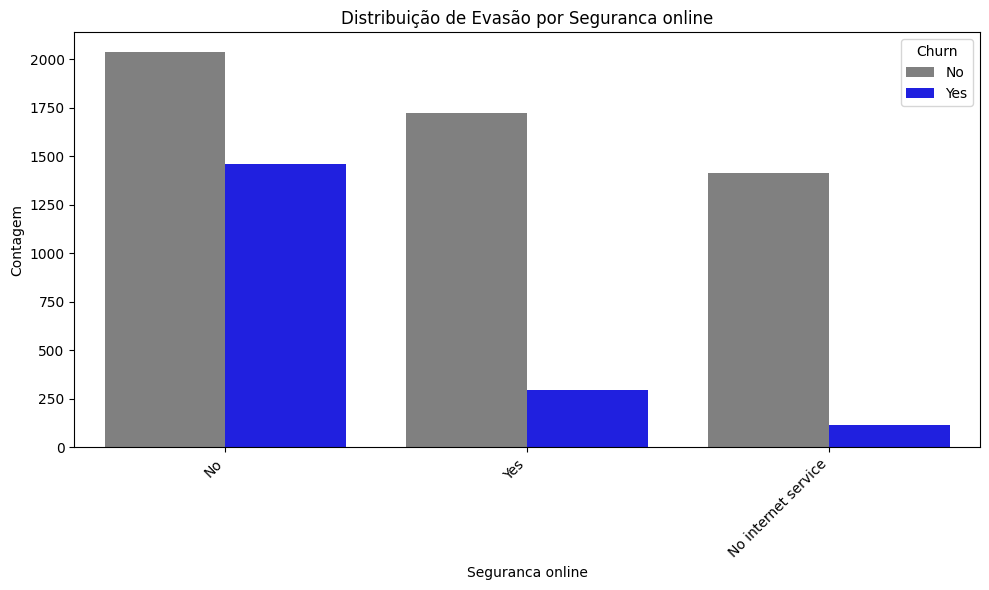

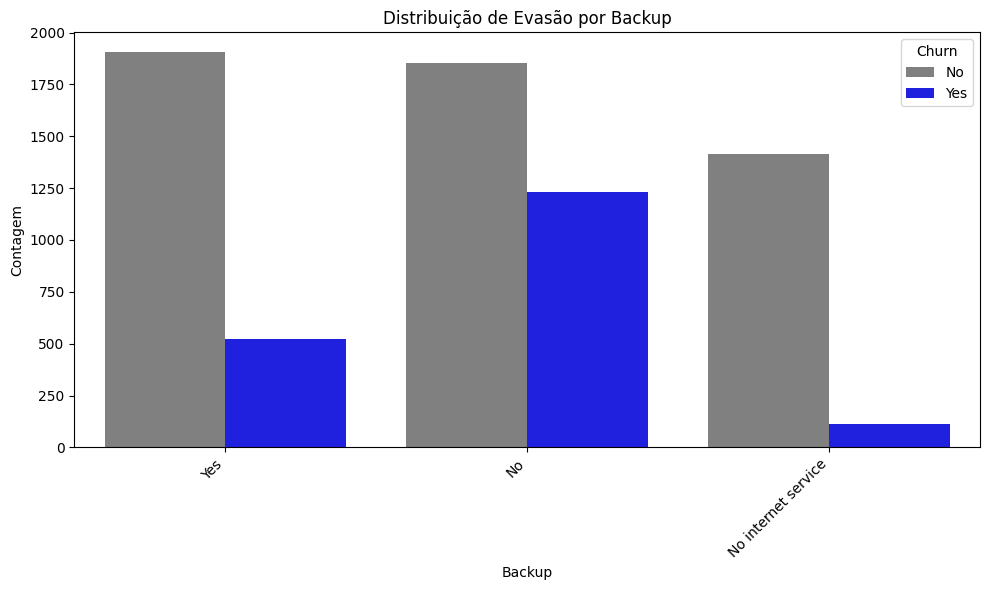

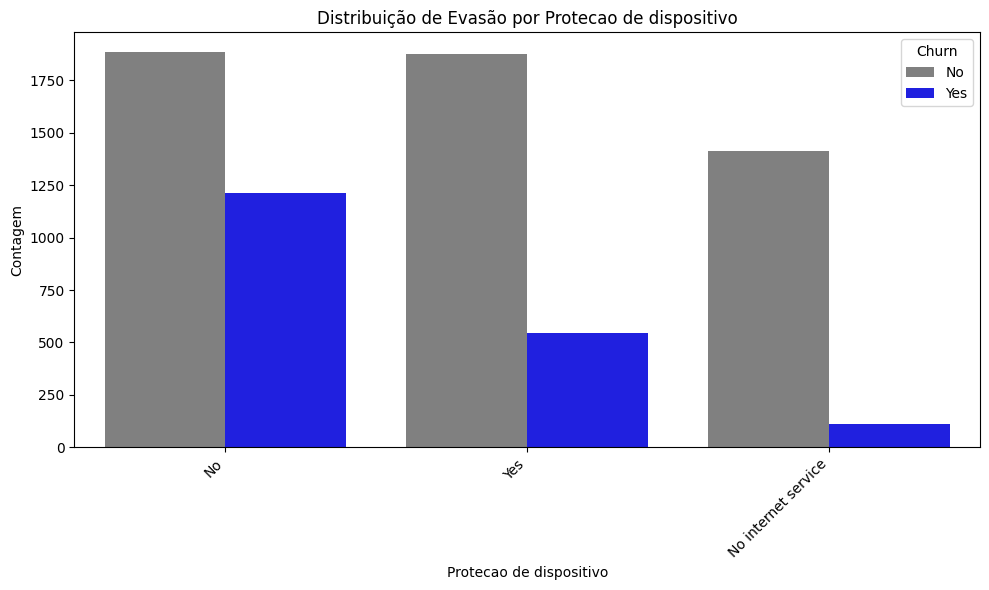

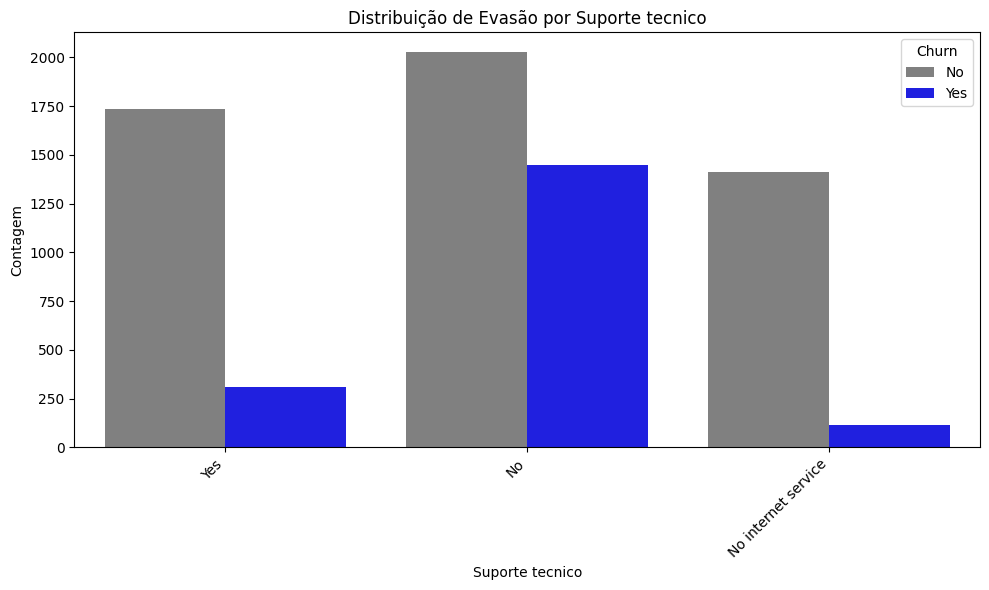

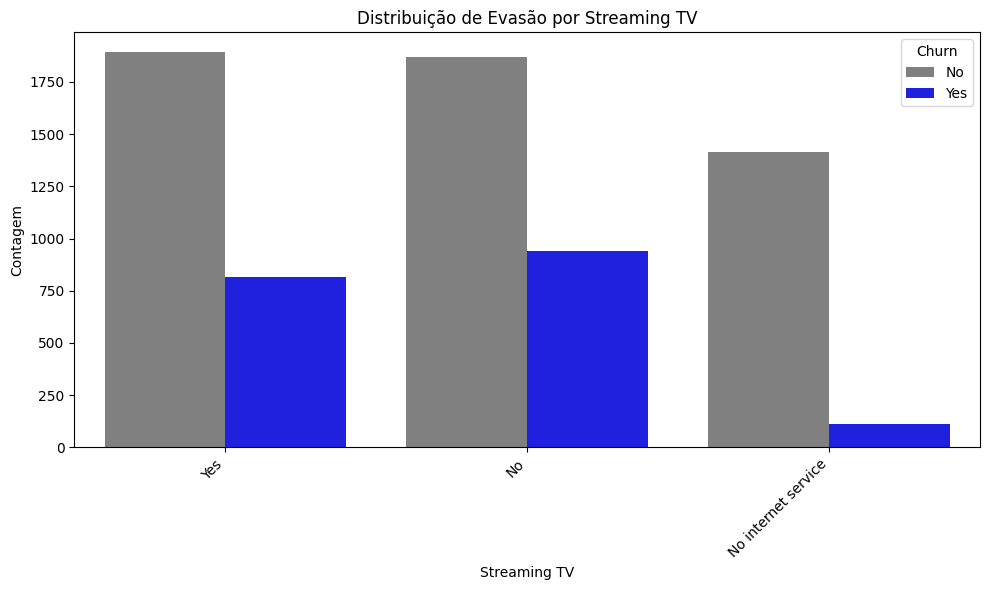

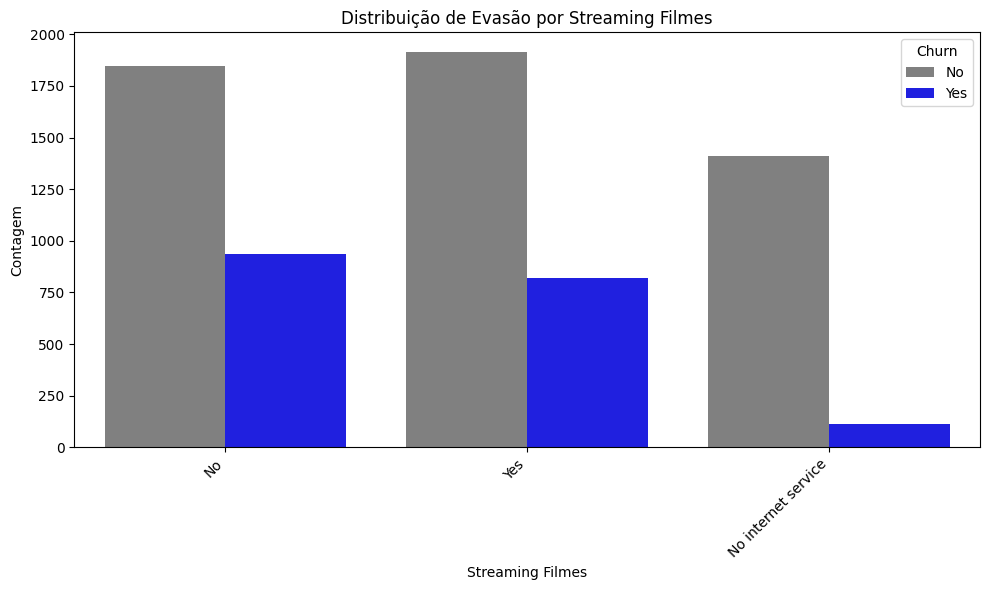

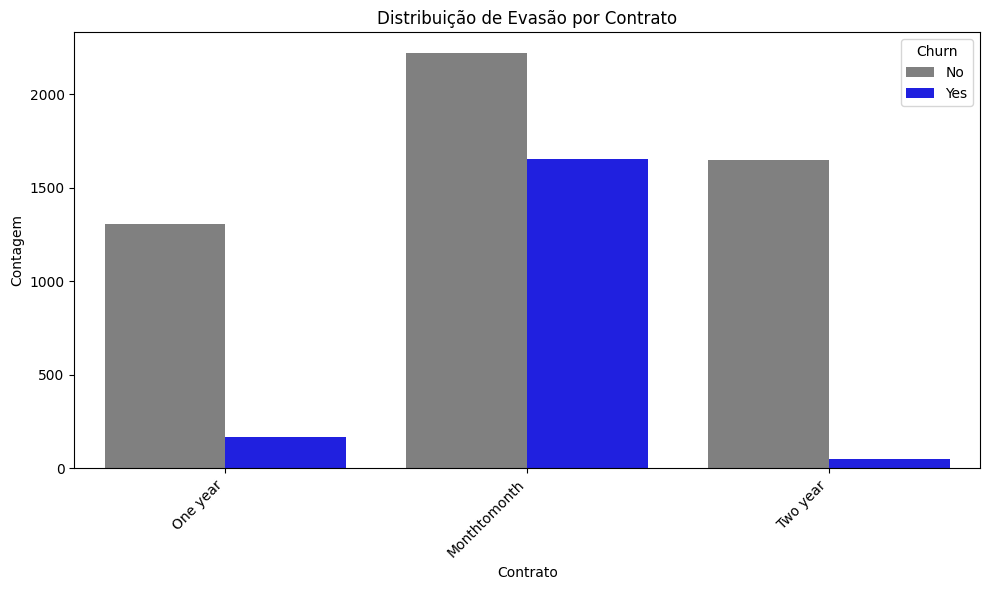

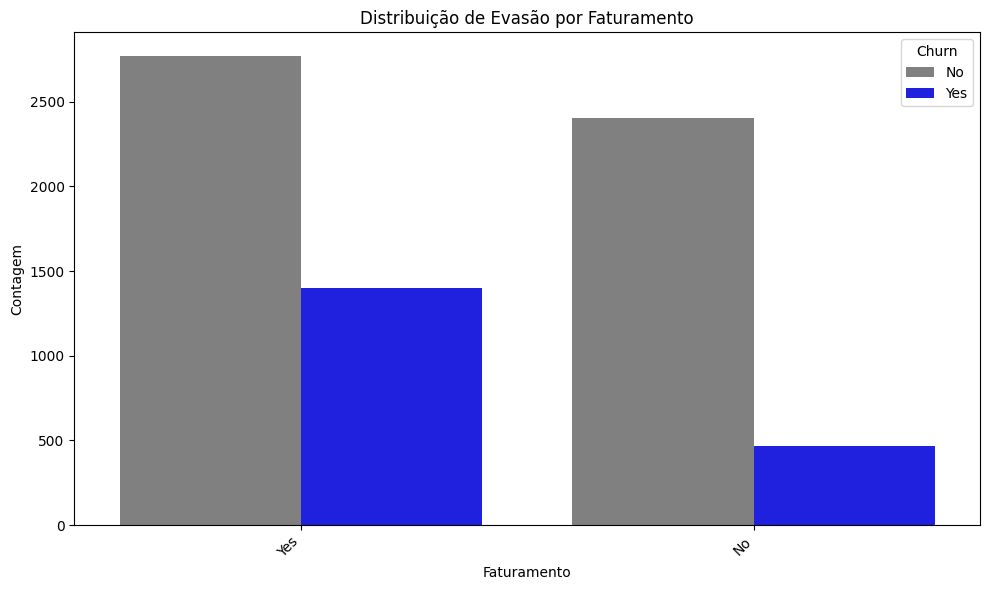

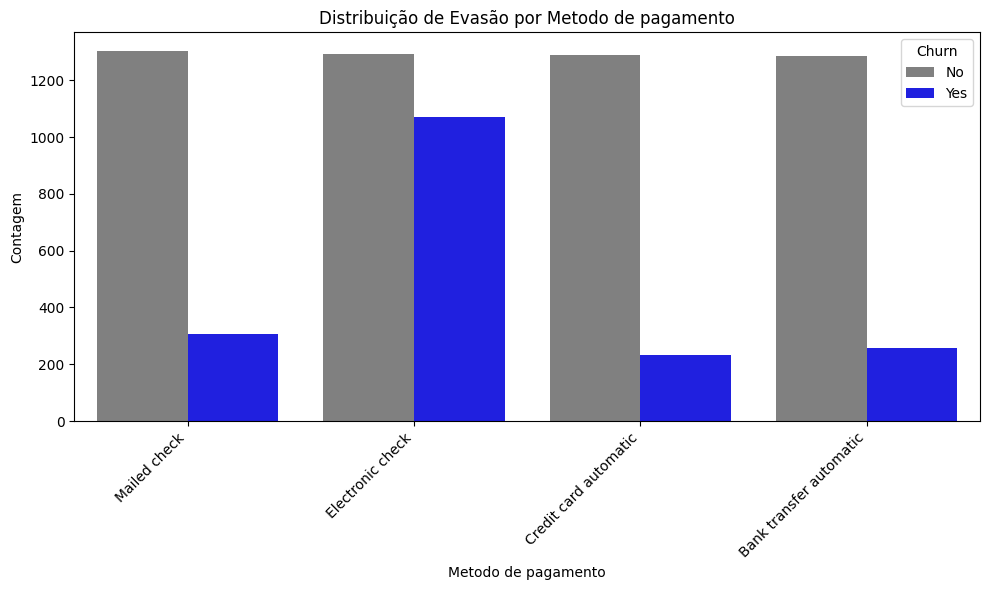

In [13]:
# prompt: Agora, vamos explorar como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.

import matplotlib.pyplot as plt
def plot_categorical_churn_distribution(df, categorical_col):
    if 'Churn' not in df.columns:
        print("Coluna 'Churn' não encontrada.")
        return
    if categorical_col not in df.columns:
        print(f"Coluna '{categorical_col}' não encontrada.")
        return

    df_filtered = df[df['Churn'].isin(['Yes', 'No'])].copy()
    # Remove linhas onde a coluna categórica é NaN
    df_filtered.dropna(subset=[categorical_col], inplace=True)


    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtered, x=categorical_col, hue='Churn', palette={'Yes':'blue', 'No':'gray'})
    plt.title(f'Distribuição de Evasão por {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor visualização
    plt.tight_layout()
    plt.show()

# Lista de colunas categóricas para analisar
categorical_columns_to_analyze = [
    'Genero',
    'Idoso',
    'Parceiro',
    'Dependentes',
    'Telefone',
    'Multiplas linhas',
    'Servico de internet',
    'Seguranca online',
    'Backup',
    'Protecao de dispositivo',
    'Suporte tecnico',
    'Streaming TV',
    'Streaming Filmes',
    'Contrato',
    'Faturamento',
    'Metodo de pagamento'
]

# Itera sobre as colunas categóricas e plota a distribuição de evasão
for col in categorical_columns_to_analyze:
    plot_categorical_churn_distribution(df_expandido, col)


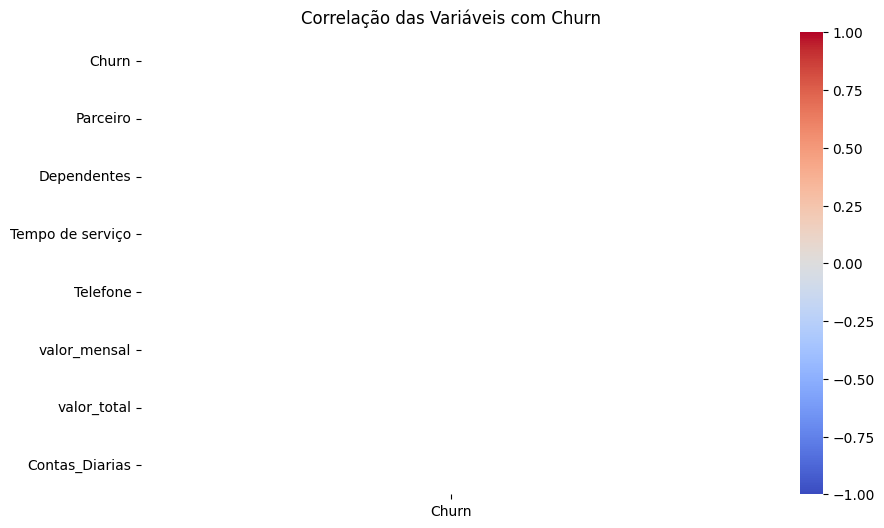

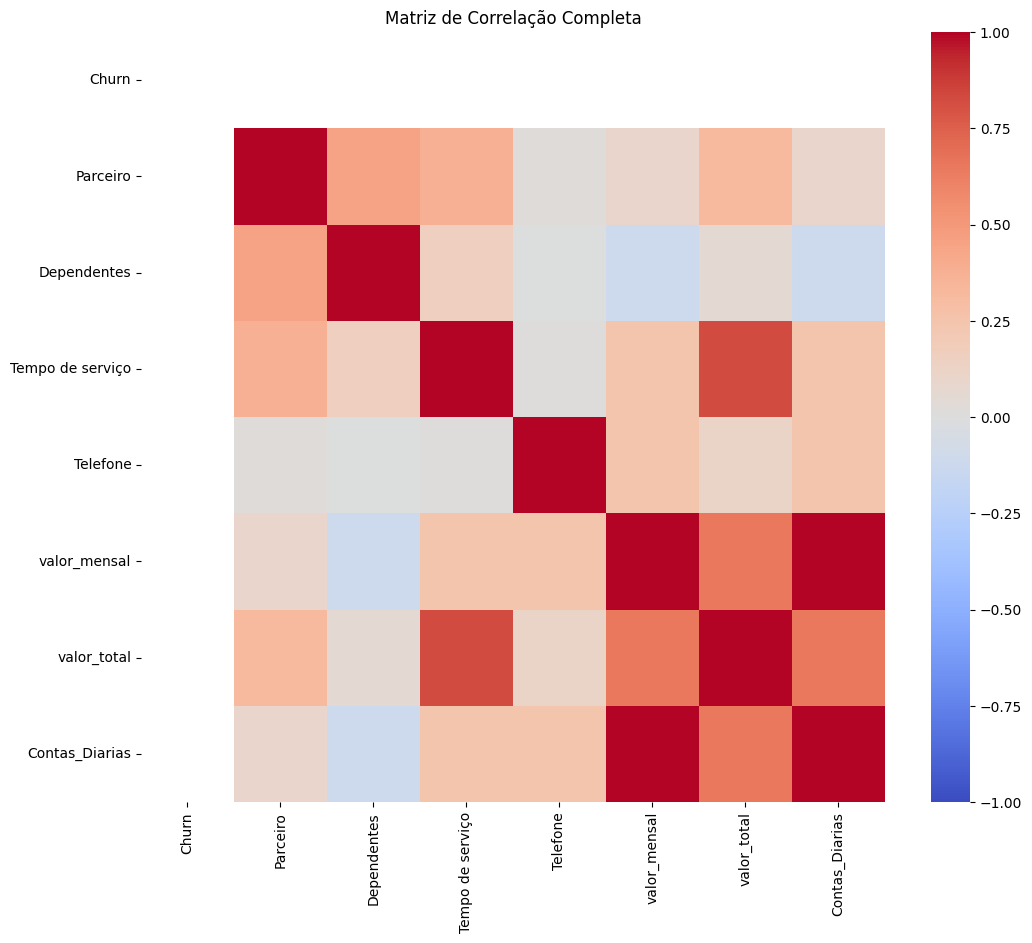

In [14]:
# Análise de Correlação entre Variáveis
import matplotlib.pyplot as plt
import seaborn as sns

# Certifique-se de que a variável 'churn' esteja em formato numérico
if df_expandido['Churn'].dtype == 'object':
    df_expandido['Churn'] = df_expandido['Churn'].map({'Sim': 1, 'Não': 0})

# Calcula a correlação
correlacoes = df_expandido.corr(numeric_only=True)

# Exibe a matriz de correlação com foco em churn
plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação das Variáveis com Churn')
plt.show()

# (Opcional) Matriz completa
plt.figure(figsize=(12, 10))
sns.heatmap(correlacoes, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação Completa')
plt.show()
